In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
import os

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'O', 'P', 'Q', 'R', 'U', 'V', 'W', 'X', 'Y']
class_names_label = {class_name:i for i,class_name in enumerate(class_names)}

nb_classes = len(class_names)
print(class_names_label)
IMAGE_SIZE = (50,50)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'O': 11, 'P': 12, 'Q': 13, 'R': 14, 'U': 15, 'V': 16, 'W': 17, 'X': 18, 'Y': 19}


#Data transformation

In [127]:
def load_data():
    datasets = ['/content/drive/MyDrive/Year 2 Sem 2/TML-project/Crop/']   #path where your dataset is stored
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        for folder in os.listdir(dataset):#subfolder
            label = class_names_label[folder]
            
            for file in os.listdir(os.path.join(dataset,folder)):
                if file[-3:] in {'jpg','png'}:
                    img_path = os.path.join(os.path.join(dataset,folder),file)
                    
                    image = Image.open(img_path)
                    image = image.convert('RGB')
                    image = image.resize(IMAGE_SIZE) #resize images to size 50,50
                    
                    images.append(image)
                    labels.append(label)

        images = np.array([np.array(image) for image in images])
        labels = np.array([np.array(label) for label in labels])    
        
    return images,labels

In [147]:
(X,y) = load_data()

Loading /content/drive/MyDrive/Year 2 Sem 2/TML-project/Crop/


In [148]:
print(X.shape)
print(y.shape)

(2400, 50, 50, 3)
(2400,)


In [149]:
type(X)

numpy.ndarray

In [150]:
y

array([ 9,  9,  9, ..., 16, 16, 16])

#Train a model

In [151]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% training, 20% testing

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42) #60% training, 20% validation, 20% testing

In [152]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(1440, 50, 50, 3)
(1440,)
(480, 50, 50, 3)
(480,)
(480, 50, 50, 3)
(480,)


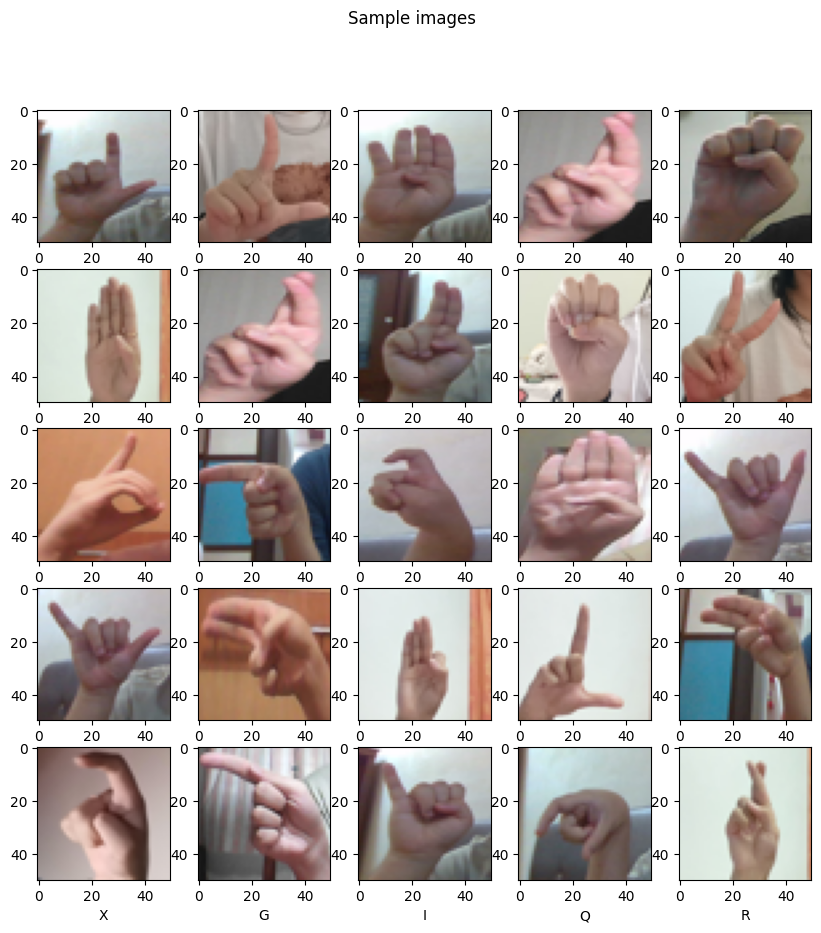

In [153]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Sample images')
for i in range(25):
    plt.subplot(5,5,i+1)
#   plt.xticks =([])
#   plt.yticks = []
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

In [154]:
#normalization
x_train = x_train/255
x_test = x_test/255
x_valid = x_valid/255

In [155]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(1440, 50, 50, 3)
(1440,)
(480, 50, 50, 3)
(480,)
(480, 50, 50, 3)
(480,)


In [156]:
x_train_flat = x_train.reshape(-1,50*50*3)
x_test_flat = x_test.reshape(-1,50*50*3)
x_valid_flat = x_valid.reshape(-1,50*50*3)

In [157]:
print(x_train_flat.shape)
print(y_train.shape)
print(x_test_flat.shape)
print(y_test.shape)
print(x_valid_flat.shape)
print(y_valid.shape)

(1440, 7500)
(1440,)
(480, 7500)
(480,)
(480, 7500)
(480,)


Algorithm - Convolution Neural Network

In [158]:
#Algorithm - #Convolution Neural Network
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [159]:
#one hot encoding using keras (numpy related utilities)
n_classes = 20

print("Shape before ont-hot-encoding: ",y_train.shape)

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
y_valid = np_utils.to_categorical(y_valid, n_classes)

print("Shape after ont-hot-encoding: ",y_train.shape)

Shape before ont-hot-encoding:  (1440,)
Shape after ont-hot-encoding:  (1440, 20)


In [160]:
#building a linear stack of layers with the sequential model
model  = Sequential()

#convolution layer
model.add(Conv2D(25, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(50,50,3,)))
model.add(MaxPool2D(pool_size=(1,1)))

#flatten output of conv
model.add(Flatten())

#hidden layer
model.add(Dense(200, activation='relu'))

#output layer
model.add(Dense(20, activation='softmax'))

#looking at the model summary
model.summary()

#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model for 10 epoch
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_valid, y_valid))


print("\n\n")
loss_v, accuracy_v = model.evaluate(x_valid, y_valid, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=1)
print("\n\nValidation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy_train, loss_train))

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 48, 48, 25)        700       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 48, 48, 25)       0         
 g2D)                                                            
                                                                 
 flatten_40 (Flatten)        (None, 57600)             0         
                                                                 
 dense_81 (Dense)            (None, 200)               11520200  
                                                                 
 dense_82 (Dense)            (None, 20)                4020      
                                                                 
Total params: 11,524,920
Trainable params: 11,524,920
Non-trainable params: 0
_________________________________________

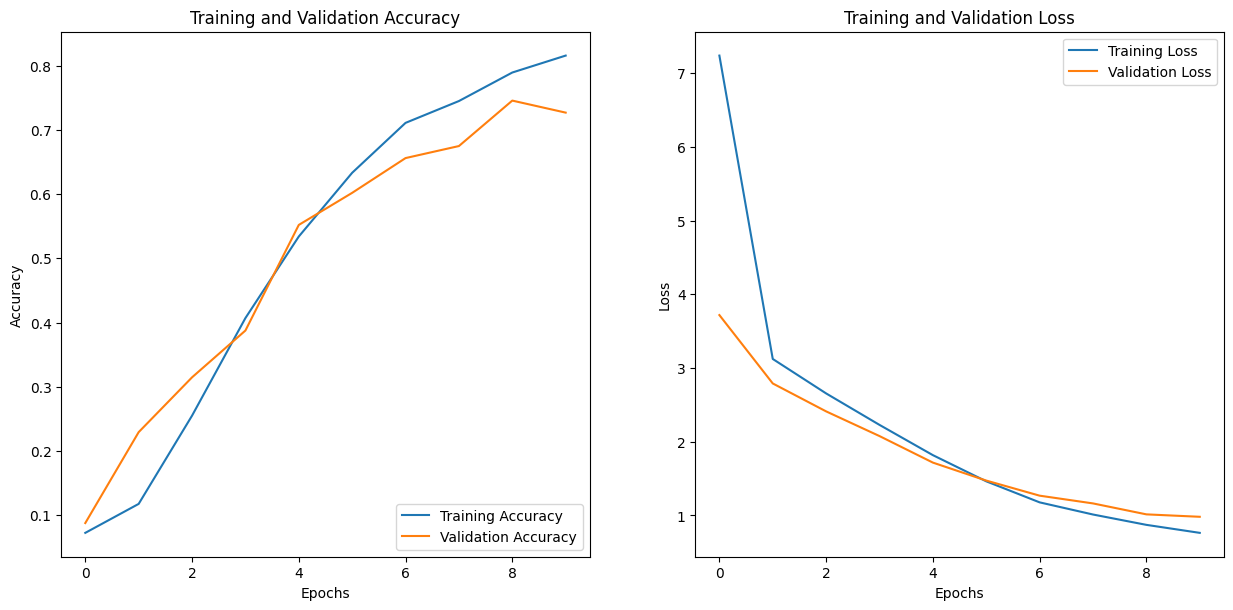

In [161]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#Tuning hyperparameter

In [162]:
#epoch = 15
model  = Sequential()

#convolution layer
model.add(Conv2D(25, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(50,50,3,)))
model.add(SpatialDropout2D(0.2))
model.add(MaxPool2D(pool_size=(1,1)))

#flatten output of conv
model.add(Flatten())

#hidden layer
model.add(Dense(200, activation='relu'))

#output layer
model.add(Dense(20, activation='softmax'))

#looking at the model summary
model.summary()

#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model for 10 epoch
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_valid, y_valid))


print("\n\n")
loss_v, accuracy_v = model.evaluate(x_valid, y_valid, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=1)
print("\n\nValidation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy_train, loss_train))

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 48, 48, 25)        700       
                                                                 
 spatial_dropout2d_11 (Spati  (None, 48, 48, 25)       0         
 alDropout2D)                                                    
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 48, 48, 25)       0         
 g2D)                                                            
                                                                 
 flatten_41 (Flatten)        (None, 57600)             0         
                                                                 
 dense_83 (Dense)            (None, 200)               11520200  
                                                                 
 dense_84 (Dense)            (None, 20)              

In [163]:
#tuning hyperparameter - epoch = 20

#building a linear stack of layers with the sequential model
model  = Sequential()

#convolution layer
model.add(Conv2D(25, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(50,50,3,)))
model.add(MaxPool2D(pool_size=(1,1)))

#flatten output of conv
model.add(Flatten())

#hidden layer
model.add(Dense(200, activation='relu'))

#output layer
model.add(Dense(20, activation='softmax'))

#looking at the model summary
model.summary()

#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model for 20 epoch
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_valid, y_valid))


print("\n\n")
loss_v, accuracy_v = model.evaluate(x_valid, y_valid, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=1)
print("\n\nValidation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy_train, loss_train))

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 48, 48, 25)        700       
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 48, 48, 25)       0         
 g2D)                                                            
                                                                 
 flatten_42 (Flatten)        (None, 57600)             0         
                                                                 
 dense_85 (Dense)            (None, 200)               11520200  
                                                                 
 dense_86 (Dense)            (None, 20)                4020      
                                                                 
Total params: 11,524,920
Trainable params: 11,524,920
Non-trainable params: 0
_________________________________________

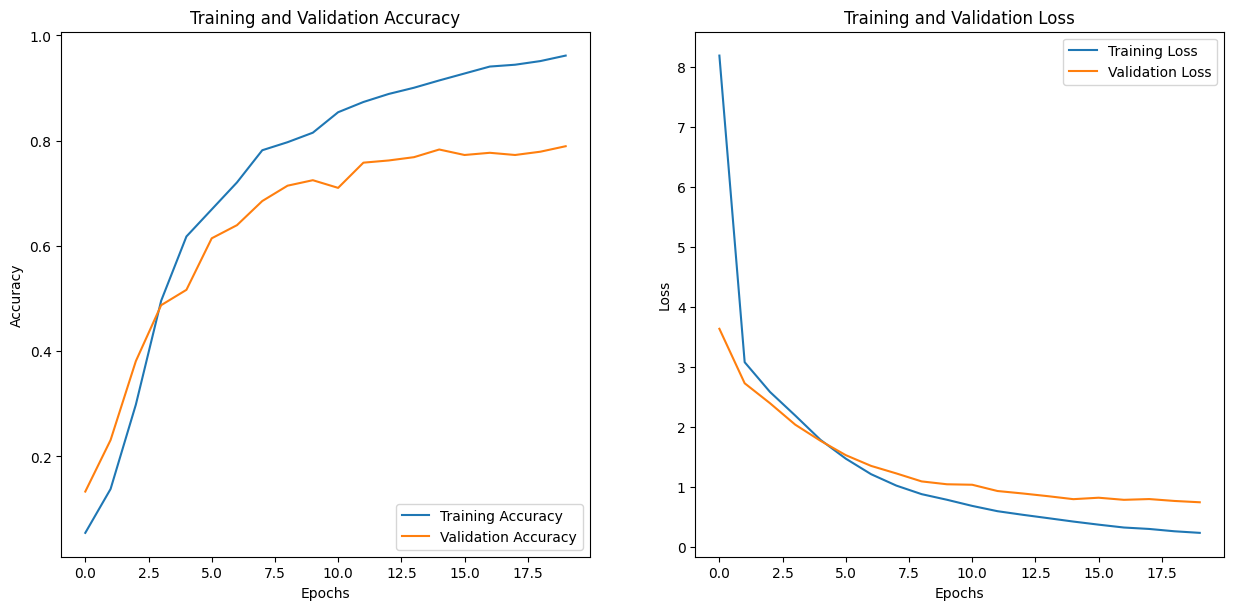

In [164]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [165]:
#tuning hyperparameter - epoch = 20, batch-size=250

#building a linear stack of layers with the sequential model
model  = Sequential()

#convolution layer
model.add(Conv2D(25, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(50,50,3,)))
model.add(MaxPool2D(pool_size=(1,1)))

#flatten output of conv
model.add(Flatten())

#hidden layer
model.add(Dense(200, activation='relu'))

#output layer
model.add(Dense(20, activation='softmax'))

#looking at the model summary
model.summary()

#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model for 20 epoch
history = model.fit(x_train, y_train, batch_size=250, epochs=20, validation_data=(x_valid, y_valid))

print("\n\n")
loss_v, accuracy_v = model.evaluate(x_valid, y_valid, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=1)
print("\n\nValidation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy_train, loss_train))

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 48, 48, 25)        700       
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 48, 48, 25)       0         
 g2D)                                                            
                                                                 
 flatten_43 (Flatten)        (None, 57600)             0         
                                                                 
 dense_87 (Dense)            (None, 200)               11520200  
                                                                 
 dense_88 (Dense)            (None, 20)                4020      
                                                                 
Total params: 11,524,920
Trainable params: 11,524,920
Non-trainable params: 0
_________________________________________

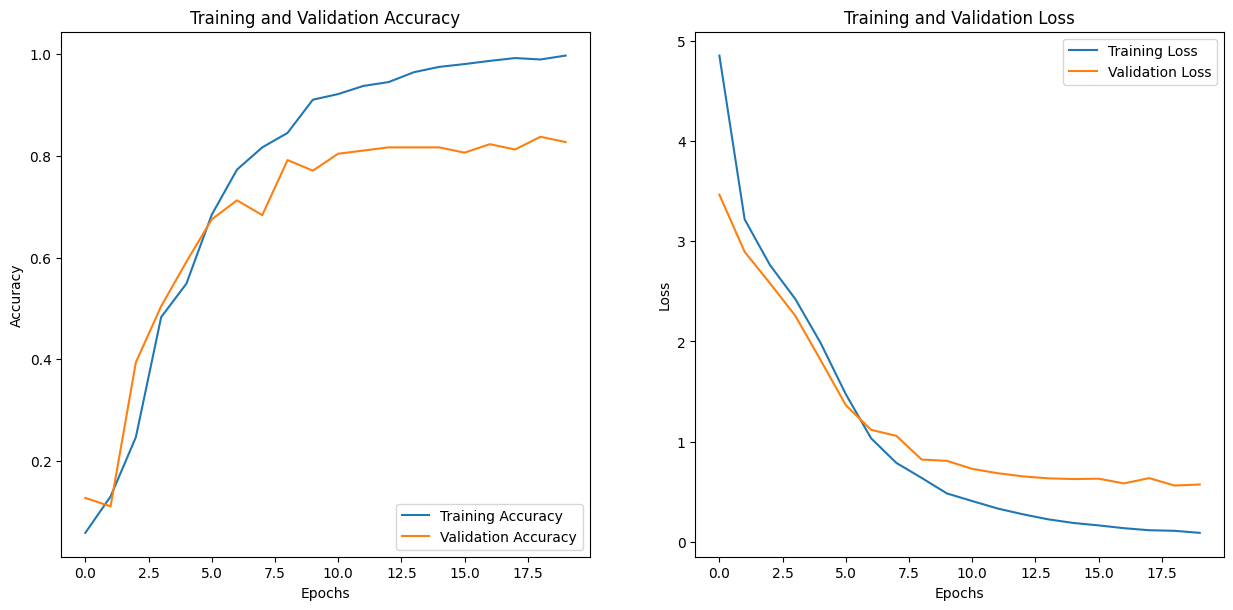

In [166]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [167]:
#convolution layer = 32

#building a linear stack of layers with the sequential model
model  = Sequential()

#convolution layer
model.add(Conv2D(32, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(50,50,3,)))
model.add(MaxPool2D(pool_size=(1,1)))

#flatten output of conv
model.add(Flatten())

#hidden layer
model.add(Dense(200, activation='relu'))

#output layer
model.add(Dense(20, activation='softmax'))

#looking at the model summary
model.summary()

#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model for 20 epoch
history = model.fit(x_train, y_train, batch_size=250, epochs=20, validation_data=(x_valid, y_valid))

print("\n\n")
loss_v, accuracy_v = model.evaluate(x_valid, y_valid, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=1)
print("\n\nValidation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy_train, loss_train))

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 flatten_44 (Flatten)        (None, 73728)             0         
                                                                 
 dense_89 (Dense)            (None, 200)               14745800  
                                                                 
 dense_90 (Dense)            (None, 20)                4020      
                                                                 
Total params: 14,750,716
Trainable params: 14,750,716
Non-trainable params: 0
_________________________________________

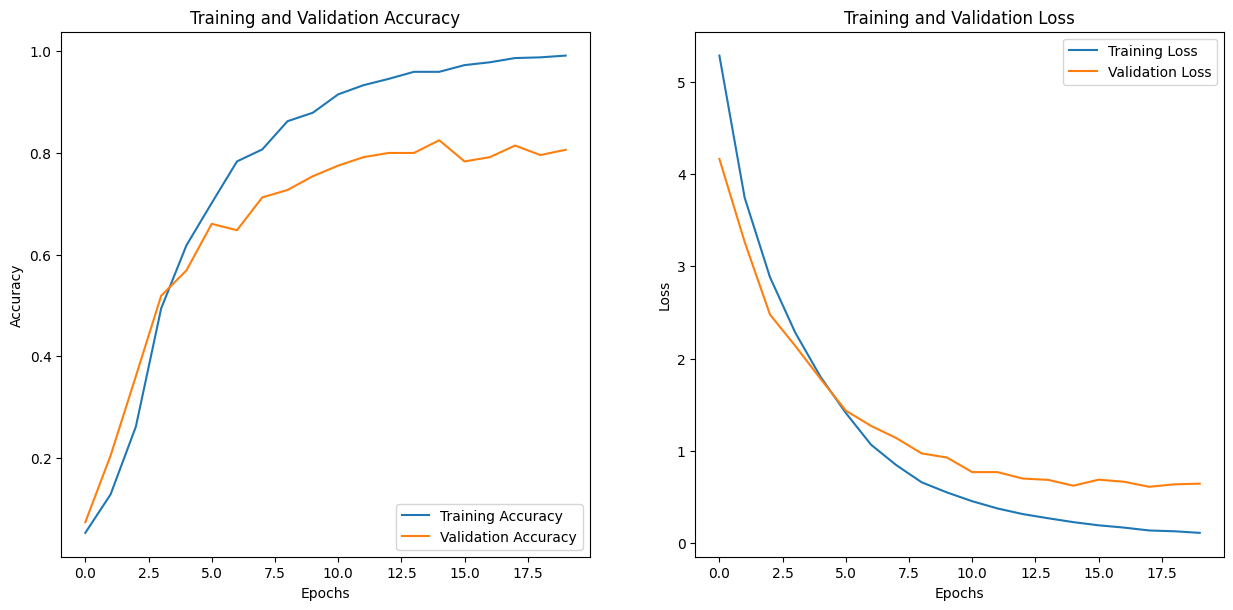

In [168]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [169]:
#convolution layer = 32, 2 convolution layer

#building a linear stack of layers with the sequential model
model  = Sequential()

#convolution layer
model.add(Conv2D(32, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(50,50,3,)))
model.add(MaxPool2D(pool_size=(1,1)))

#convolution layer
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(1,1)))

#flatten output of conv
model.add(Flatten())

#hidden layer
model.add(Dense(200, activation='relu'))

#output layer
model.add(Dense(20, activation='softmax'))

#looking at the model summary
model.summary()

#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model for 20 epoch
history = model.fit(x_train, y_train, batch_size=250, epochs=20, validation_data=(x_valid, y_valid))

print("\n\n")
loss_v, accuracy_v = model.evaluate(x_valid, y_valid, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=1)
print("\n\nValidation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy_train, loss_train))

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 46, 46, 64)       0         
 g2D)                                                            
                                                                 
 flatten_45 (Flatten)        (None, 135424)            0         
                                                                 
 dense_91 (Dense)            (None, 200)             

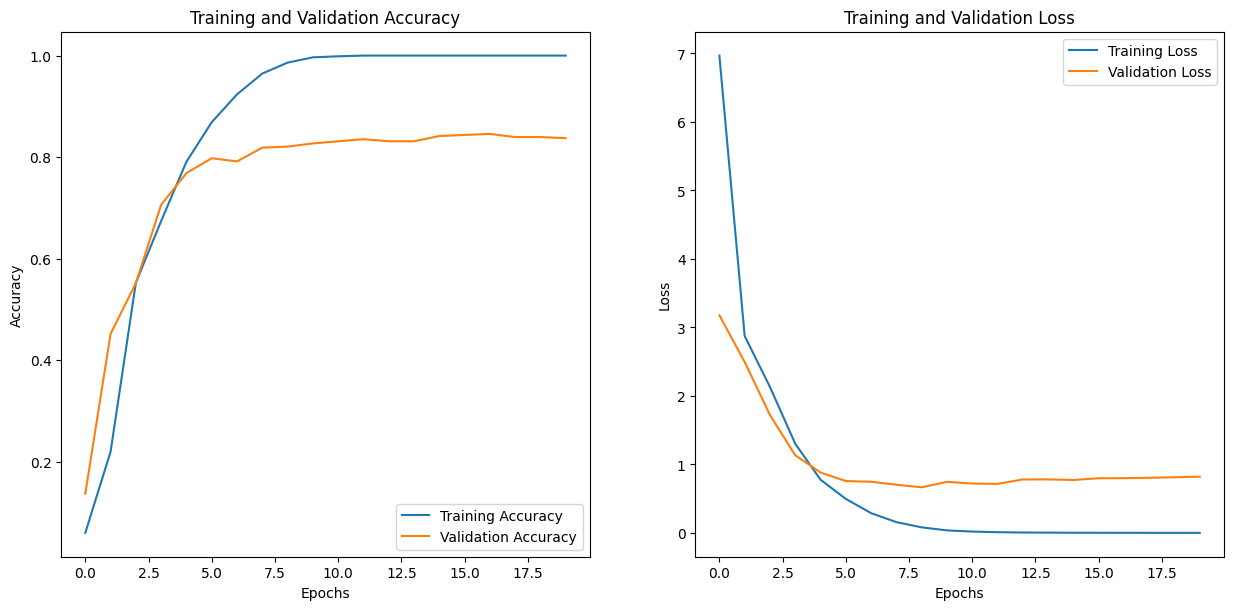

In [170]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [171]:
#kernel size = (5,5)

#building a linear stack of layers with the sequential model
model  = Sequential()

#convolution layer
model.add(Conv2D(32, kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu',input_shape=(50,50,3,)))
model.add(MaxPool2D(pool_size=(1,1)))

#convolution layer
model.add(Conv2D(64, kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(1,1)))

#flatten output of conv
model.add(Flatten())

#hidden layer
model.add(Dense(200, activation='relu'))

#output layer
model.add(Dense(20, activation='softmax'))

#looking at the model summary
model.summary()

#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model for 20 epoch
history = model.fit(x_train, y_train, batch_size=250, epochs=20, validation_data=(x_valid, y_valid))

print("\n\n")
loss_v, accuracy_v = model.evaluate(x_valid, y_valid, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=1)
print("\n\nValidation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy_train, loss_train))

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 46, 46, 32)        2432      
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 46, 46, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 42, 42, 64)        51264     
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 42, 42, 64)       0         
 g2D)                                                            
                                                                 
 flatten_46 (Flatten)        (None, 112896)            0         
                                                                 
 dense_93 (Dense)            (None, 200)             

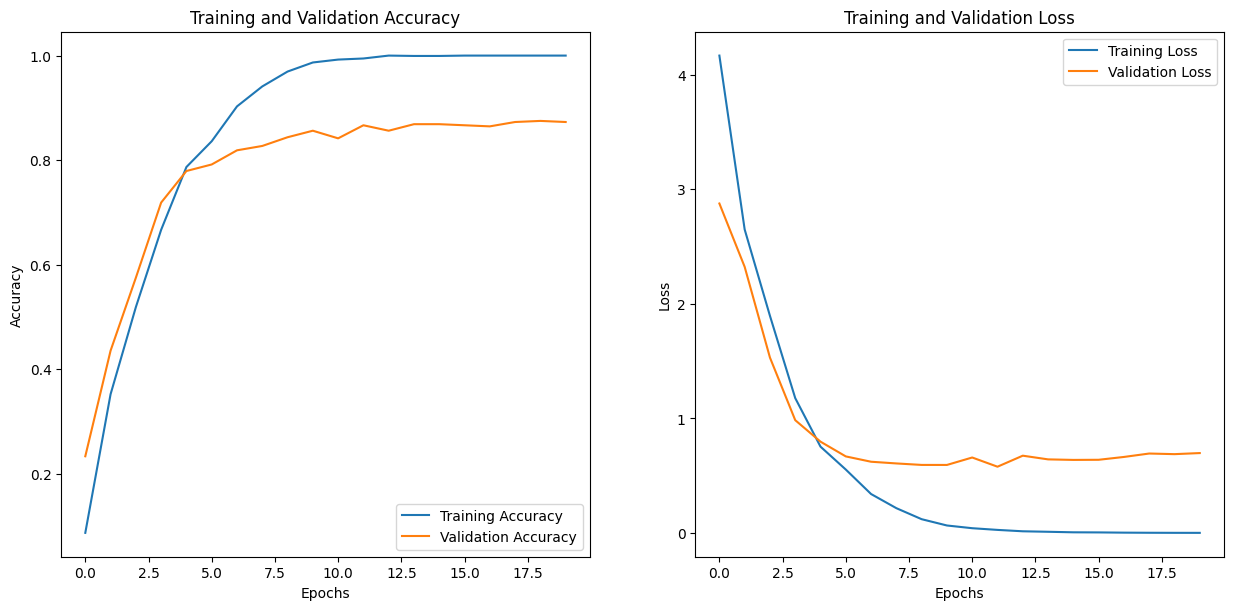

In [172]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [173]:
#strides=(2,2)

#building a linear stack of layers with the sequential model
model  = Sequential()

#convolution layer
model.add(Conv2D(32, kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu',input_shape=(50,50,3,)))
model.add(MaxPool2D(pool_size=(1,1)))

#convolution layer
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(1,1)))

#flatten output of conv
model.add(Flatten())

#hidden layer
model.add(Dense(200, activation='relu'))

#output layer
model.add(Dense(20, activation='softmax'))

#looking at the model summary
model.summary()

#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model for 20 epoch
history = model.fit(x_train, y_train, batch_size=250, epochs=20, validation_data=(x_valid, y_valid))

print("\n\n")
loss_v, accuracy_v = model.evaluate(x_valid, y_valid, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=1)
print("\n\nValidation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy_train, loss_train))

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 24, 24, 32)        896       
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 flatten_47 (Flatten)        (None, 30976)             0         
                                                                 
 dense_95 (Dense)            (None, 200)             

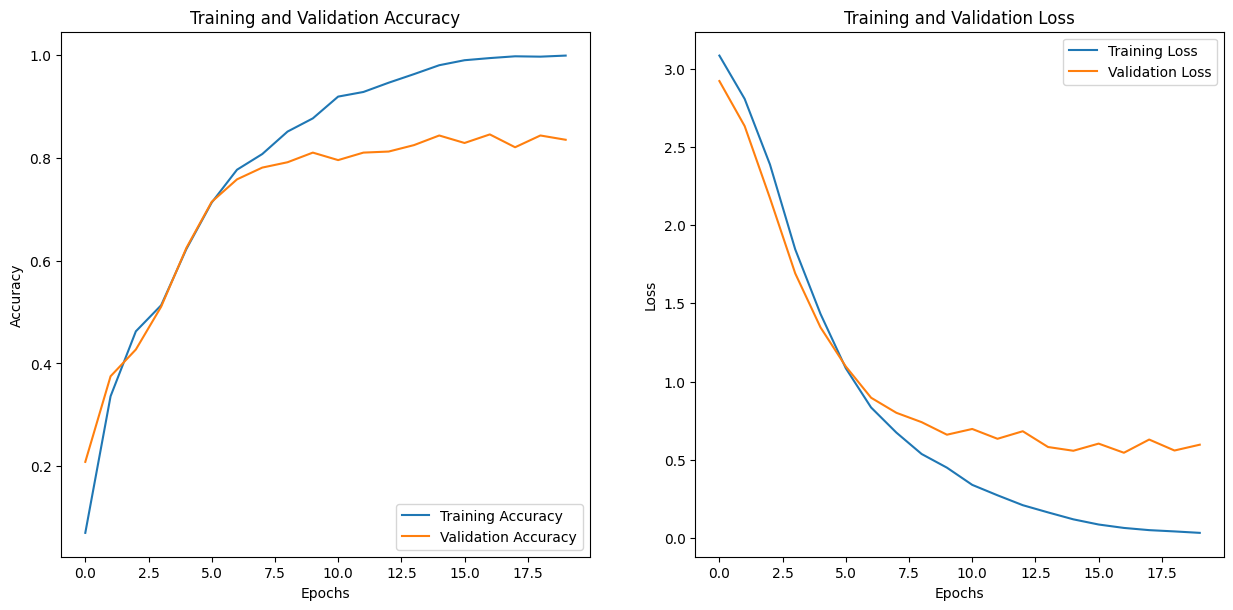

In [174]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [175]:
#strides=(2,2), pool size=(2,2)

#building a linear stack of layers with the sequential model
model  = Sequential()

#convolution layer
model.add(Conv2D(32, kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu',input_shape=(50,50,3,)))
model.add(MaxPool2D(pool_size=(2,2)))

#convolution layer
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#flatten output of conv
model.add(Flatten())

#hidden layer
model.add(Dense(200, activation='relu'))

#output layer
model.add(Dense(20, activation='softmax'))

#looking at the model summary
model.summary()

#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model for 25 epoch
history = model.fit(x_train, y_train, batch_size=250, epochs=25, validation_data=(x_valid, y_valid))

print("\n\n")
loss_v, accuracy_v = model.evaluate(x_valid, y_valid, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=1)
print("\n\nValidation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy_train, loss_train))

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 24, 24, 32)        896       
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_48 (Flatten)        (None, 1600)              0         
                                                                 
 dense_97 (Dense)            (None, 200)             

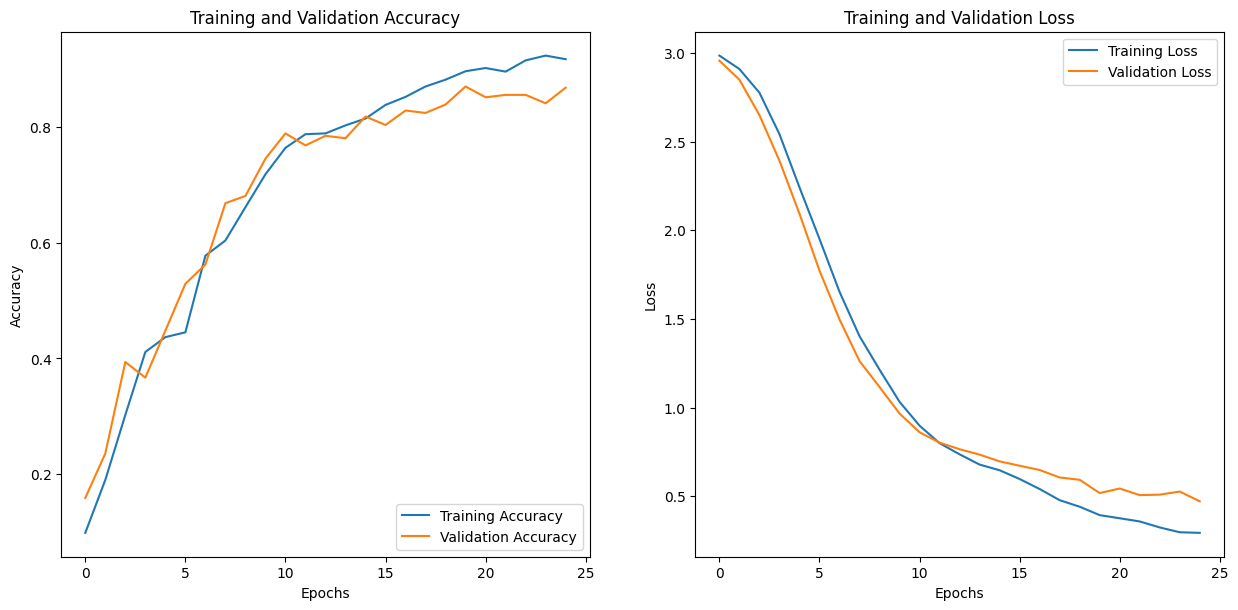

In [176]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [177]:
#strides=(2,2), pool size=(2,2), apply dropout

#building a linear stack of layers with the sequential model
model  = Sequential()

#convolution layer
model.add(Conv2D(32, kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu',input_shape=(50,50,3,)))
model.add(MaxPool2D(pool_size=(2,2)))

#convolution layer
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#flatten output of conv
model.add(Flatten())

#Dropout
model.add(Dropout(0.5))

#hidden layer
model.add(Dense(200, activation='relu'))

#output layer
model.add(Dense(20, activation='softmax'))

#looking at the model summary
model.summary()

#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model for 25 epoch
history = model.fit(x_train, y_train, batch_size=250, epochs=25, validation_data=(x_valid, y_valid))

print("\n\n")
loss_v, accuracy_v = model.evaluate(x_valid, y_valid, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=1)
print("\n\nValidation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy_train, loss_train))

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 24, 24, 32)        896       
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_49 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)            

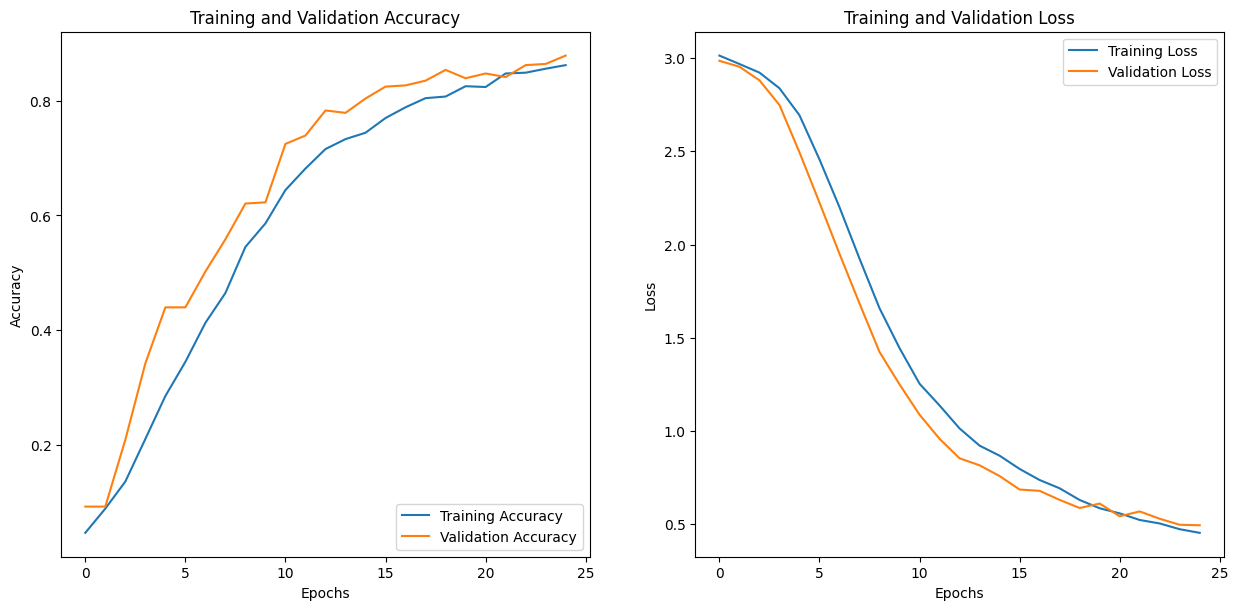

In [178]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [179]:
#strides=(2,2), pool size=(2,2), apply spatial dropout (dropout entire feature maps from the convolutional layer which are then not used during pooling)

from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, SpatialDropout2D

#building a linear stack of layers with the sequential model
model  = Sequential()

#convolution layer
model.add(Conv2D(32, kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu',input_shape=(50,50,3,)))
#model.add(MaxPool2D(pool_size=(2,2)))

#convolution layer
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(SpatialDropout2D(0.5))
model.add(MaxPool2D(pool_size=(2,2)))

#flatten output of conv
model.add(Flatten())

#hidden layer
model.add(Dense(200, activation='relu'))

#output layer
model.add(Dense(20, activation='softmax'))

#looking at the model summary
model.summary()

#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model for 25 epoch
history = model.fit(x_train, y_train, batch_size=250, epochs=25, validation_data=(x_valid, y_valid))

print("\n\n")
loss_v, accuracy_v = model.evaluate(x_valid, y_valid, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=1)
print("\n\nValidation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy_train, loss_train))

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 24, 24, 32)        896       
                                                                 
 conv2d_82 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 spatial_dropout2d_12 (Spati  (None, 22, 22, 64)       0         
 alDropout2D)                                                    
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 flatten_50 (Flatten)        (None, 7744)              0         
                                                                 
 dense_101 (Dense)           (None, 200)             

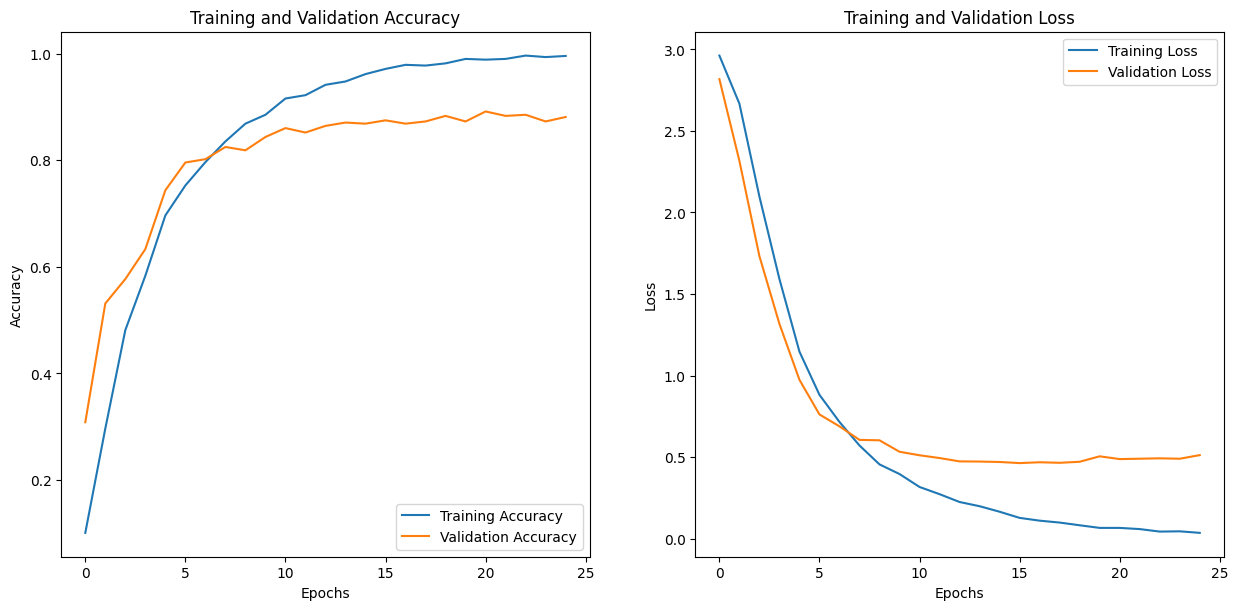

In [180]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [181]:
#hidden layer = 500

from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, SpatialDropout2D

#building a linear stack of layers with the sequential model
model  = Sequential()

#convolution layer
model.add(Conv2D(32, kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu',input_shape=(50,50,3,)))
#model.add(MaxPool2D(pool_size=(2,2)))

#convolution layer
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(SpatialDropout2D(0.5))
model.add(MaxPool2D(pool_size=(2,2)))

#flatten output of conv
model.add(Flatten())

#hidden layer
model.add(Dense(500, activation='relu'))

#output layer
model.add(Dense(20, activation='softmax'))

#looking at the model summary
model.summary()

#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model for 25 epoch
history = model.fit(x_train, y_train, batch_size=250, epochs=25, validation_data=(x_valid, y_valid))

print("\n\n")
loss_v, accuracy_v = model.evaluate(x_valid, y_valid, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=1)
print("\n\nValidation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy_train, loss_train))

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_83 (Conv2D)          (None, 24, 24, 32)        896       
                                                                 
 conv2d_84 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 spatial_dropout2d_13 (Spati  (None, 22, 22, 64)       0         
 alDropout2D)                                                    
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 flatten_51 (Flatten)        (None, 7744)              0         
                                                                 
 dense_103 (Dense)           (None, 500)             

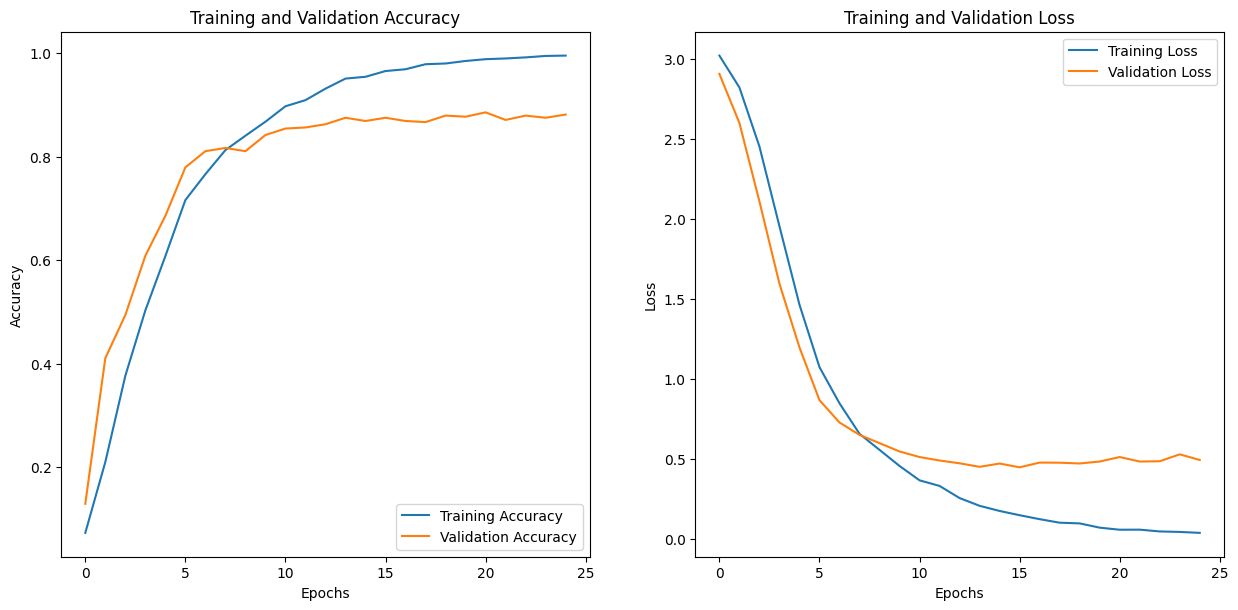

In [182]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [183]:
#batch size = 350

from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, SpatialDropout2D

#building a linear stack of layers with the sequential model
model  = Sequential()

#convolution layer
model.add(Conv2D(64, kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu',input_shape=(50,50,3,)))
#model.add(MaxPool2D(pool_size=(2,2)))

#convolution layer
model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(SpatialDropout2D(0.2))
model.add(MaxPool2D(pool_size=(2,2)))

#flatten output of conv
model.add(Flatten())

#hidden layer
model.add(Dense(500, activation='relu'))

#output layer
model.add(Dense(20, activation='softmax'))

#looking at the model summary
model.summary()

#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model for 25 epoch
history = model.fit(x_train, y_train, batch_size=350, epochs=25, validation_data=(x_valid, y_valid))


print("\n\n")
loss_v, accuracy_v = model.evaluate(x_valid, y_valid, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=1)
print("\n\nValidation: accuracy = %.4f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %.4f  ;  loss = %f" % (accuracy, loss))
print("Train: accuracy = %.4f  ;  loss = %f" % (accuracy_train, loss_train))

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 24, 24, 64)        1792      
                                                                 
 conv2d_86 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 spatial_dropout2d_14 (Spati  (None, 22, 22, 128)      0         
 alDropout2D)                                                    
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 11, 11, 128)      0         
 g2D)                                                            
                                                                 
 flatten_52 (Flatten)        (None, 15488)             0         
                                                                 
 dense_105 (Dense)           (None, 500)             

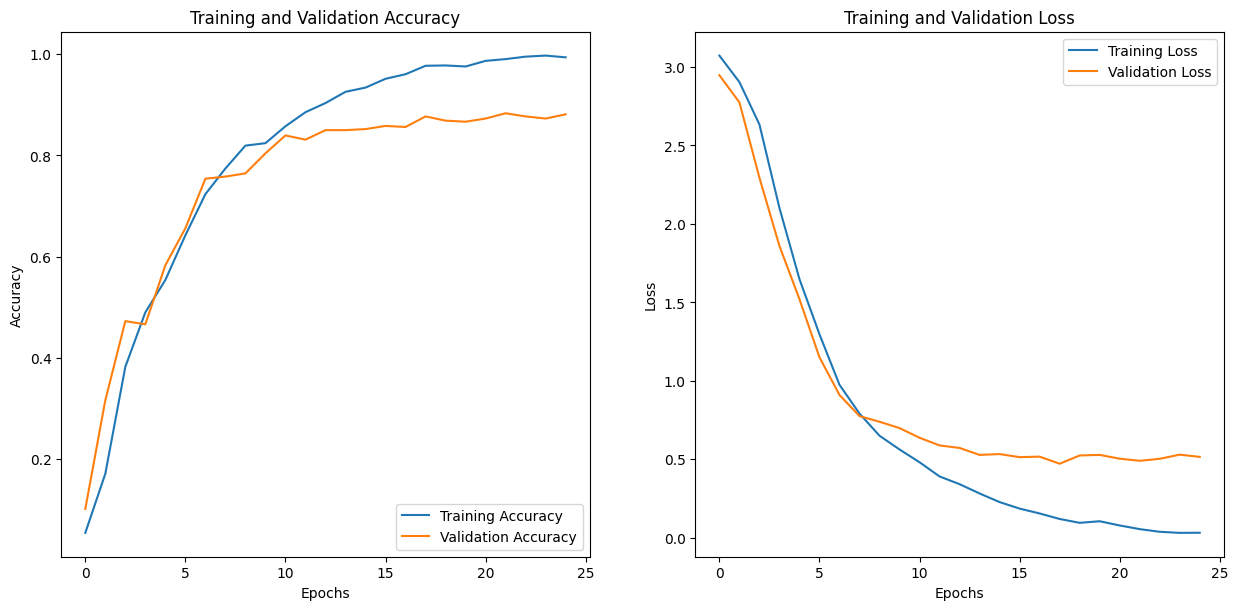

In [184]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [185]:
print(accuracy)

0.8583333492279053


#Prediction using testing data

In [186]:
#cnn_features_train = model.predict(x_train)
pred = model.predict(x_test)
pred = np.argmax(pred, axis=-1)

#original labels
labels = np.argmax(y_test, axis=-1)

print("Prediction" ,pred) 
print("Label of test data", labels)
print("\n\n")

15/15 [==============================] - 1s 3ms/step
Prediction [19 19  0 13 19  1 15 13 15  7 13  9  0 11 10 13  1 10 11 17  6 18  6 18
 15  8 12 13 16 18 13  4 19  8  4 18  1  5  8  6  3  7  7  8  9  4 19 18
 12  4  4 16  3 10 19 13 16 16 15 17 13  0 16  6 12 17 14  3 10  6 11 19
 16 17  1  2 12  1  7 11  1  7 10  7 19  0  4  8  9  9 14  5  2 12 11 18
  1  7 15 12 14  7  0 15 19 19 14  0 13 11  7 13 12 13  7  2 17 13  1  5
  5 17  8 16 10  8  7 12  6  5 18  4 16  2  4 15 19  1 10  7  9 19 15 11
  4 16 17  9  7  3 17 18  6  2 17  7  6  1  1 14 10  0  5  9  5 17 11  1
  3  1  3 12 13  1  3  5  2  5 18 19  7  2  3 18 13 11 15 13  9 12 15  3
 11  6 16  2  2 12 12 17 14  4  0 15 12  6 14  3  3  2 17  3  6 11  2 16
 13 18 11  7  0  3 16 15  1 13  5  6  0 11 14 13  0 13  1  1 12  3 16  0
  8 15 16  0  6  3  6 12 12  8  3  8  2 15 18 11 14  3  5  9  9  5  9  4
 12 16  7  1  8  0  2 12  0 13  5 18  3  0 10 15  3 19 18  2 15  3  3  9
  6 12  8  8 13  8  0  1  5 10 10  2  4  0 13  5  9  8 10  6

#Classification report

In [187]:
from sklearn.metrics import classification_report

print(classification_report(labels,pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.88      0.93      0.90        30
           2       0.92      1.00      0.96        24
           3       0.93      0.87      0.90        31
           4       1.00      0.80      0.89        20
           5       0.92      0.88      0.90        25
           6       0.88      0.84      0.86        25
           7       0.77      0.80      0.78        25
           8       0.76      0.90      0.83        21
           9       0.85      0.85      0.85        20
          10       1.00      1.00      1.00        24
          11       0.90      0.95      0.93        20
          12       0.92      0.92      0.92        26
          13       0.85      0.93      0.89        30
          14       0.94      0.62      0.75        24
          15       0.67      0.75      0.71        24
          16       0.52      0.65      0.58        17
          17       0.68    

#Confusion matrix

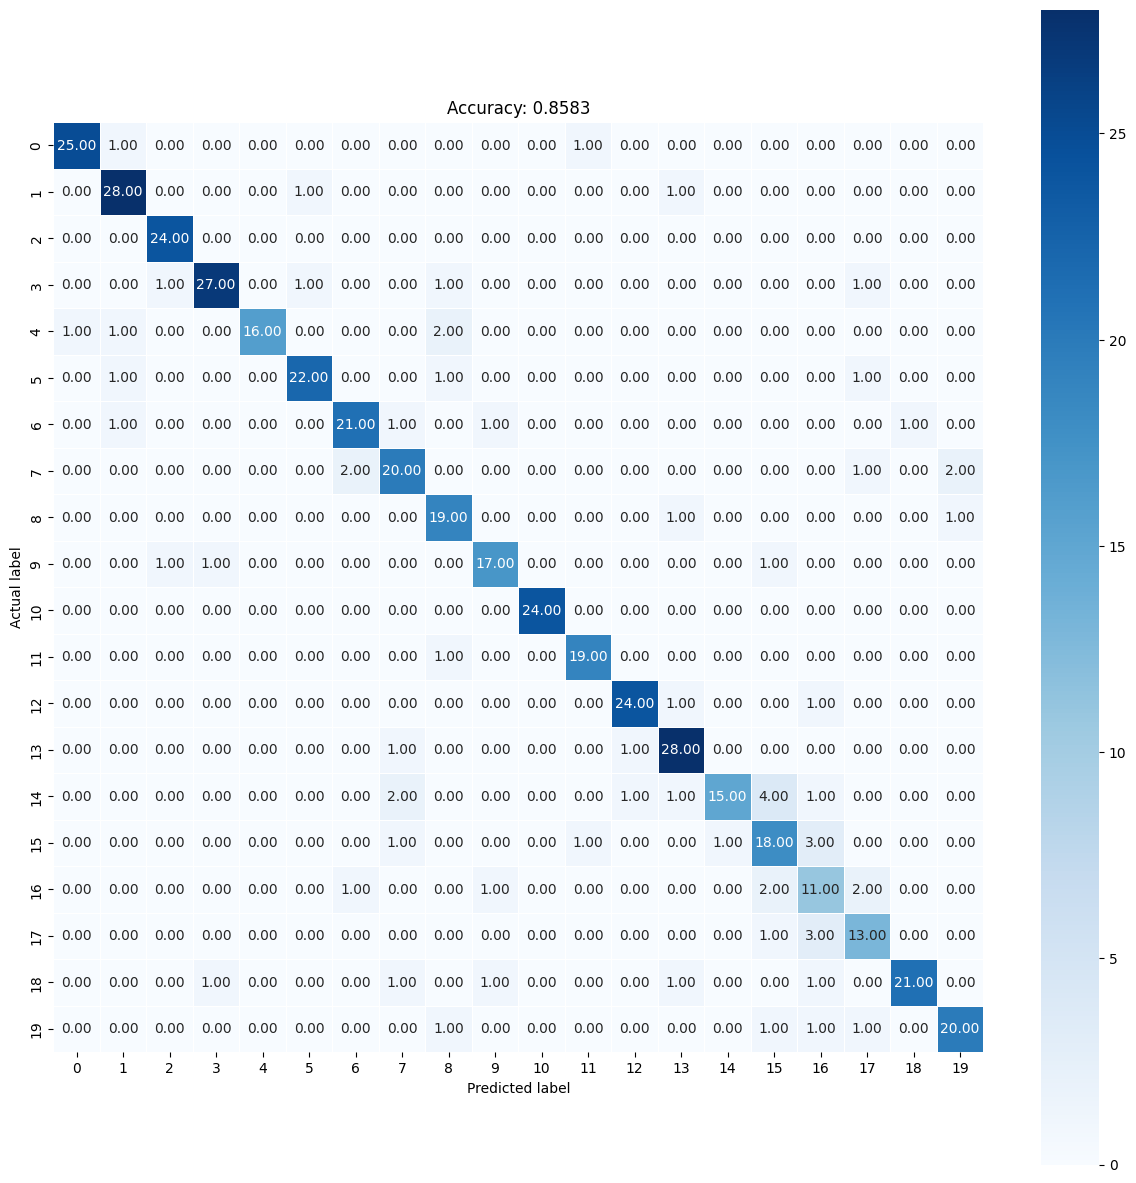

In [188]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

cm = confusion_matrix(labels,pred)

plt.figure(figsize=(15,15))

sns.heatmap(cm, annot=True, fmt='.2f',
            linewidth=0.5, square=True, cmap='Blues')

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Accuracy: {:.4f}'.format(accuracy_score(labels,pred)))
plt.show()

1/1 [==============================] - 0s 75ms/step


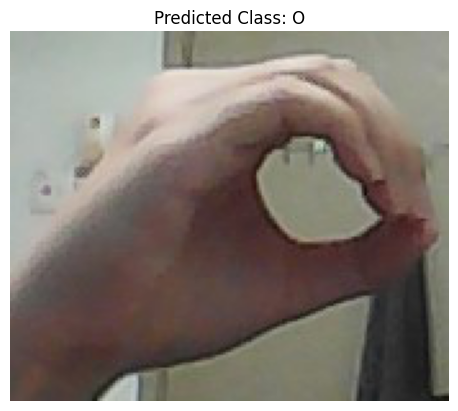

In [189]:
import random

parent_folder = '/content/drive/MyDrive/Year 2 Sem 2/TML-project/Crop/'       
subfolders = [f.path for f in os.scandir(parent_folder) if f.is_dir()]
random_subfolder = random.choice(subfolders)
image_files = [f.path for f in os.scandir(random_subfolder) if f.is_file() and f.name.endswith(('.jpg', '.jpeg', '.png'))]

# Select a random image
random_image_path = random.choice(image_files)

# Open the random image
random_image = Image.open(random_image_path)

# Preprocess the image
random_image_c = random_image.convert('RGB')
random_image_c = random_image.resize(IMAGE_SIZE)
#random_image_flat = np.array(random_image_c).reshape(-1,50*50*3)

# Classify the image using the trained SVC model
predicted_probs = model.predict(np.expand_dims(random_image_c, axis=0))
predicted_class_index =np.argmax(predicted_probs)
# Determine the corresponding class name
predicted_class_name = class_names[predicted_class_index]

# Display the image and predicted class name
fig, ax = plt.subplots()

ax.imshow(random_image)
ax.set_title('Predicted Class: ' + predicted_class_name)
ax.axis('off')

plt.show()